Problem 2a)

In [2]:
#Project 2 
#Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [46]:
#Read image
colored_image = cv2.imread("wolves.png")
grey_image = cv2.cvtColor(colored_image,cv2.COLOR_BGR2GRAY)


colored_image_rgb = cv2.cvtColor(colored_image,cv2.COLOR_BGR2RGB)

In [29]:
grey_image

array([[  5,   1,   8, ...,  20,  19,  14],
       [  1,  10,   4, ...,  20,  12,   8],
       [  3,   5,   5, ...,   4,   2,   5],
       ...,
       [114, 114, 114, ...,  34,  35,  36],
       [105, 105, 105, ...,  42,  44,  45],
       [102, 101, 101, ...,  37,  39,  40]], dtype=uint8)

In [30]:
def downscale_transform(img,I_min,I_max,new_min_intensity,new_max_intensity):
    
    ds_img = (img-I_min)*(new_max_intensity-new_min_intensity)/(I_max-I_min)
    return ds_img

In [31]:
ds_img = downscale_transform(grey_image,0,255,0,1)
ds_img

array([[0.01960784, 0.00392157, 0.03137255, ..., 0.07843137, 0.0745098 ,
        0.05490196],
       [0.00392157, 0.03921569, 0.01568627, ..., 0.07843137, 0.04705882,
        0.03137255],
       [0.01176471, 0.01960784, 0.01960784, ..., 0.01568627, 0.00784314,
        0.01960784],
       ...,
       [0.44705882, 0.44705882, 0.44705882, ..., 0.13333333, 0.1372549 ,
        0.14117647],
       [0.41176471, 0.41176471, 0.41176471, ..., 0.16470588, 0.17254902,
        0.17647059],
       [0.4       , 0.39607843, 0.39607843, ..., 0.14509804, 0.15294118,
        0.15686275]])

Implementing DFT

In [72]:
def dft2(img):
    dfft = np.zeros(img.shape,dtype=complex) 
    print(img.shape)
    for i in range(img.shape[0]):#iterating over cols
        dfft[i] = np.fft.fft(img[i])
    
    dfft = np.transpose(dfft)

    for j in range(img.shape[1]): #iterating again
        dfft[j] = np.fft.fft(dfft[j])

    dfft = np.transpose(dfft)
    print(dfft)
    return dfft
    # print(dfft)


In [73]:
dfft = dft2(ds_img)



(539, 1500)
[[309749.69411765    +0.j         -43779.52839391-33084.28644852j
  -14588.54690431 -2617.35851031j ...  -9596.71775755 +4111.57656599j
  -14588.54690431 +2617.35851031j -43779.52839391+33084.28644852j]
 [ 60326.78347039 +8892.10496815j -34297.26423775 +5098.73972996j
    2150.60226237 -6131.17970098j ... -12472.41023507+11976.53044243j
   -2621.14348949 -8360.04910609j -25652.92495484 +8288.91090502j]
 [ 13252.9833408   +835.68788497j -10709.34052319+12325.54974752j
   -1940.52669912-10258.88679056j ...  -3475.18055363 +1242.605219j
   -5917.53675298 -7589.77996631j   2558.83272453+17235.68910706j]
 ...
 [  2586.05154279   +60.05017844j   6939.14797489 -3688.72255071j
   -8783.21091252 +7432.63540663j ...   7579.1367225  -4271.37954036j
   -2642.90862199 +2428.84450562j  -8995.27295488 -6607.14483309j]
 [ 13252.9833408   -835.68788497j   2558.83272453-17235.68910706j
   -5917.53675298 +7589.77996631j ...   6195.79996278-12121.99364773j
   -1940.52669912+10258.88679056j -10

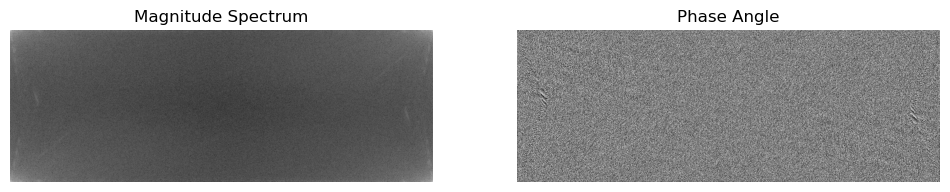

In [ ]:
#Phase
phase_fft = np.angle(dfft)
magnitude_fft = np.abs(dfft)

# scaling the magnitude_fft
s_fft = np.log(1+magnitude_fft)

# Plotting the results
plt.figure(figsize=(12, 6))
    
plt.subplot(1, 2, 1)
plt.title('Magnitude Spectrum')
plt.imshow(s_fft, cmap='gray')
plt.axis('off')
    
plt.subplot(1, 2, 2)
plt.title('Phase Angle')
plt.imshow(phase_fft, cmap='gray')
plt.axis('off')
    
plt.show()    

Shifting spectrum for better visualization

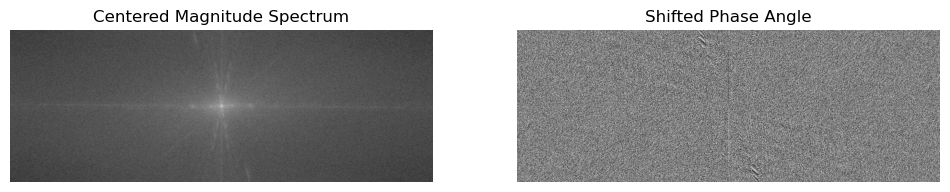

In [74]:
shifted_phasefft = np.fft.fftshift(phase_fft)
centered_spectrum = np.fft.fftshift(s_fft)

# Plotting the results
plt.figure(figsize=(12, 6))
    
plt.subplot(1, 2, 1)
plt.title('Centered Magnitude Spectrum')
plt.imshow(centered_spectrum, cmap='gray')
plt.axis('off')
    
plt.subplot(1, 2, 2)
plt.title('Shifted Phase Angle')
plt.imshow(shifted_phasefft, cmap='gray')
plt.axis('off')
    
plt.show()    

2B)

In [80]:
def idft_using_1ddft(img_dft):
    img_conj = np.conjugate(img_dft)
    g_conj = dft2(img_conj) #using above dft2 function
    
    g = np.conjugate(g_conj) / (img_dft.shape[0] * img_dft.shape[1])
    
    return g.real

In [82]:
reconstruct_img = idft_using_1ddft(dfft)


(539, 1500)
[[ 15852.94117647+1.10109942e-11j   3170.58823529+3.83290934e-11j
   25364.70588235-5.20994116e-11j ...  63411.76470588+3.89647604e-11j
   60241.17647059+1.35010909e-11j  44388.23529412-1.44101193e-11j]
 [  3170.58823529-6.25161019e-12j  31705.88235294-2.31297209e-11j
   12682.35294118-2.15908191e-11j ...  63411.76470588+2.41837954e-11j
   38047.05882353-3.46492787e-11j  25364.70588235-5.51285198e-11j]
 [  9511.76470588+7.02316330e-11j  15852.94117647+1.09156357e-11j
   15852.94117647+3.25423431e-11j ...  12682.35294118-6.93531472e-11j
    6341.17647059+6.04579964e-11j  15852.94117647-2.75526891e-11j]
 ...
 [361447.05882353+9.61470984e-12j 361447.05882353+1.51500790e-11j
  361447.05882353+1.69745660e-11j ... 107800.        +1.87827901e-11j
  110970.58823529-3.08887657e-12j 114141.17647059+5.99068913e-11j]
 [332911.76470588-2.02771846e-11j 332911.76470588-1.57794205e-11j
  332911.76470588+4.11664729e-11j ... 133164.70588235+2.81270942e-11j
  139505.88235294+3.94775248e-11j 1

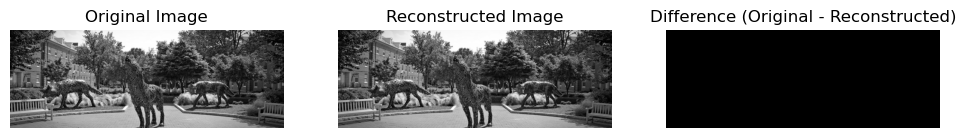

In [83]:

# Plotting the original, reconstructed, and difference images
plt.figure(figsize=(12, 4))
    
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(ds_img, cmap='gray')
plt.axis('off')
    
plt.subplot(1, 3, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstruct_img, cmap='gray')
plt.axis('off')
    
diff = ((ds_img - reconstruct_img).astype(np.uint8))
plt.subplot(1, 3, 3)
plt.title("Difference (Original - Reconstructed)")
plt.imshow(diff, cmap='gray')
plt.axis('off')
    
plt.show()

Another way 

In [ ]:
def idft(img):
    swap_img = np.conj(img)
    dft_rows = np.zeros(swap_img.shape, dtype=complex)
    for i in range(swap_img.shape[0]):
        dft_rows[i,:] = np.fft.fft(swap_img[i,:])
    
    # dft_rows = np.transpose(dft_rows)

    dft_cols = np.zeros(swap_img.shape,dtype=complex)
    for j in range(swap_img.shape[1]):
        dft_cols[:,j] = np.fft.fft(dft_rows[:,j])
    
    # dft_cols = np.transpose(dft_cols)

    idft = np.conj(dft_cols)

    idft /= (img.shape[0]*img.shape[1])

    return idft.real

In [61]:
reconstructed_img = idft(dfft)

reconstructed_img

array([[0.01960784, 0.00392157, 0.03137255, ..., 0.07843137, 0.0745098 ,
        0.05490196],
       [0.00392157, 0.03921569, 0.01568627, ..., 0.07843137, 0.04705882,
        0.03137255],
       [0.01176471, 0.01960784, 0.01960784, ..., 0.01568627, 0.00784314,
        0.01960784],
       ...,
       [0.44705882, 0.44705882, 0.44705882, ..., 0.13333333, 0.1372549 ,
        0.14117647],
       [0.41176471, 0.41176471, 0.41176471, ..., 0.16470588, 0.17254902,
        0.17647059],
       [0.4       , 0.39607843, 0.39607843, ..., 0.14509804, 0.15294118,
        0.15686275]])

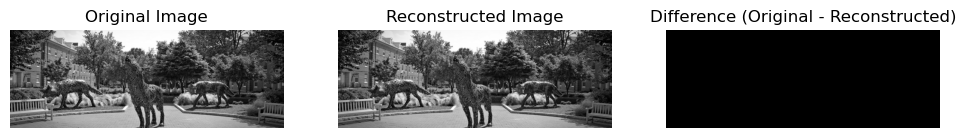

In [67]:
# Plotting the original, reconstructed, and difference images
plt.figure(figsize=(12, 4))
    
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(ds_img, cmap='gray')
plt.axis('off')
    
plt.subplot(1, 3, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_img, cmap='gray')
plt.axis('off')
    
diff = ((ds_img - reconstructed_img).astype(np.uint8))
plt.subplot(1, 3, 3)
plt.title("Difference (Original - Reconstructed)")
plt.imshow(diff, cmap='gray')
plt.axis('off')
    
plt.show()

In [65]:
diff

array([[ 2.38871423e-14,  6.63531730e-15,  2.47718512e-14, ...,
        -2.83106871e-14, -3.53883589e-14, -3.00801051e-14],
       [-2.10118381e-14, -5.30825384e-14,  1.68094705e-14, ...,
        -2.83106871e-14, -3.00801051e-14, -3.18495230e-14],
       [ 1.06165077e-14, -8.67014793e-14, -4.95437025e-14, ...,
        -1.04395659e-13, -8.53744159e-14, -4.68895756e-14],
       ...,
       [ 1.41553436e-14, -4.24660307e-14, -1.41553436e-14, ...,
        -2.83106871e-14, -7.78543896e-14,  7.07767178e-15],
       [ 2.83106871e-14, -1.41553436e-14,  2.83106871e-14, ...,
         3.53883589e-14,  0.00000000e+00, -7.07767178e-15],
       [ 7.07767178e-14, -5.66213743e-14, -4.24660307e-14, ...,
        -1.41553436e-14, -2.83106871e-14, -2.12330153e-14]])